# Data Visualization with Matplotlib

In [1]:
# Jupyter magic to display images inline
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

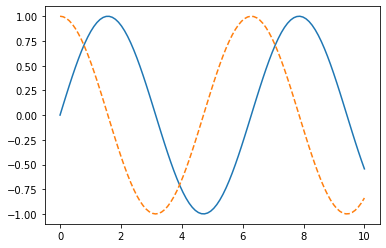

In [4]:
xs = np.r_[:10:100j]
fig = plt.figure()
y0 = np.sin(xs)
y1 = np.cos(xs)
plt.plot(xs, y0, '-')
plt.plot(xs, y1, '--');

# Saving plots

In [5]:
fig.savefig('data/figure.png')

<img src="data/figure.png">

In [6]:
!open data/figure.png

Couldn't get a file descriptor referring to the console


In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

# Matlab-style interface

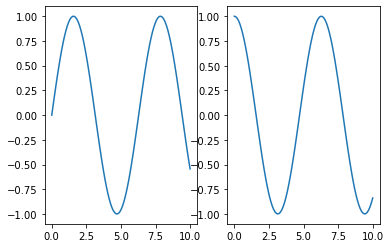

In [8]:
plt.subplot(1, 2, 1)
plt.plot(xs, y0)

plt.subplot(1, 2, 2)
plt.plot(xs, y1);

# Object-oriented interface

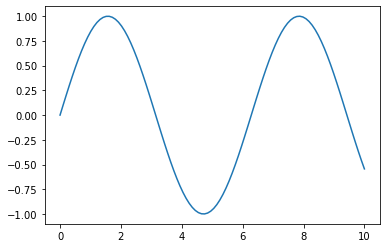

In [9]:
ax = plt.axes()
ax.plot(xs, y0);

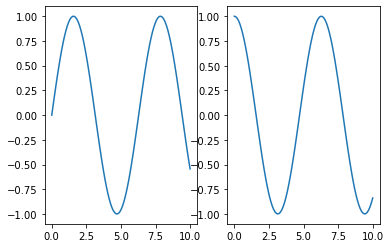

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(xs, y0)
ax1.plot(xs, y1)
plt.show()

# Colors & line styles

Color

In [11]:
plt.plot(xs, np.sin(xs - 0), color='red')
plt.plot(xs, np.sin(xs - 1), color='g') # rgbcmyk
plt.plot(xs, np.sin(xs - 2), color='0.5')
plt.plot(xs, np.sin(xs - 3), color='#ff22ee')
plt.plot(xs, np.sin(xs - 4), color=(1.0, 0.5, 0.5));

Line style

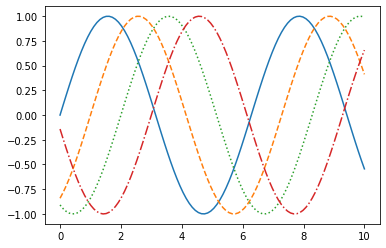

In [12]:
plt.plot(xs, np.sin(xs - 0), linestyle='solid')
plt.plot(xs, np.sin(xs - 1), linestyle='dashed')
plt.plot(xs, np.sin(xs - 2), linestyle='dotted')
plt.plot(xs, np.sin(xs - 3), linestyle='dashdot');

Shorthand notation for both:

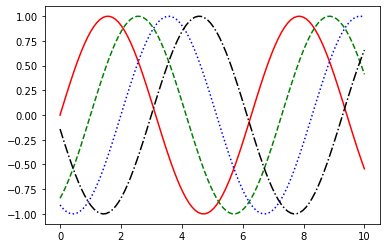

In [13]:
plt.plot(xs, np.sin(xs - 0), 'r-')
plt.plot(xs, np.sin(xs - 1), 'g--')
plt.plot(xs, np.sin(xs - 2), 'b:')
plt.plot(xs, np.sin(xs - 3), 'k-.');

# Axis settings

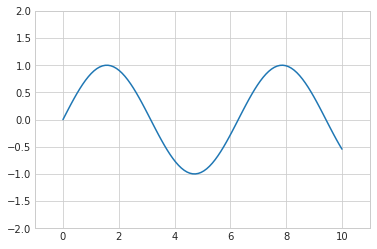

In [14]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(xs, np.sin(xs))
ax.set(xlim=(-1, 11), ylim=(-2, 2));

In [15]:
ax = plt.axes()
ax.plot(xs, np.sin(xs))
ax.set(aspect='equal', adjustable='datalim');

# Labeling

In [16]:
ax = plt.axes()
ax.plot(xs, np.sin(xs))
ax.set(title='Sinsuoid', xlabel='xs', ylabel='sin(xs)');

# Adding a legend

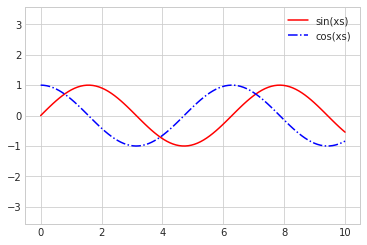

In [17]:
ax = plt.axes()
ax.plot(xs, y0, '-r', label='sin(xs)')
ax.plot(xs, y1, '-.b', label='cos(xs)')
ax.set(aspect='equal', adjustable='datalim')
ax.legend();

# Plot markers

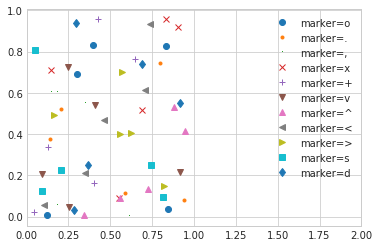

In [18]:
ax = plt.axes()
for marker in 'o.,x+v^<>sd':
    X =  np.random.random((5, 2))
    ax.plot(
        X[:,0], X[:,1], 
        marker=marker, linestyle='none',
        label=f'marker={marker}'
    )
ax.legend()
ax.set(xlim=(0, 2));


# Scatter plot, color, size


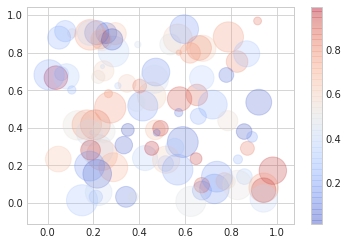

In [19]:
X = np.random.random((100, 4))
ax = plt.axes()
s = ax.scatter(
    x=X[:,0],
    y=X[:,1],
    c=X[:,2],
    s=X[:,3] * 1000,
    alpha=0.25,
    cmap='coolwarm'
);
ax.figure.colorbar(s);

# Bar charts

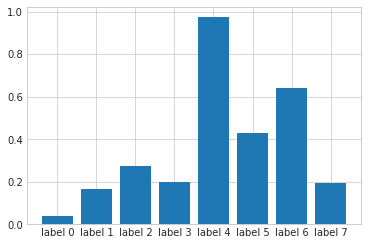

In [20]:
values = np.random.random(8)
labels = [f'label {i}' for i in range(8)]
ax = plt.axes()
ax.bar(labels, values);

# Visualizing distributions

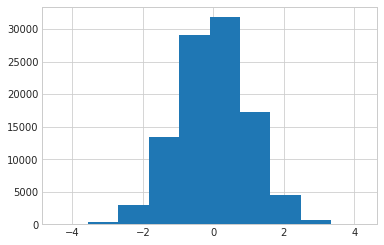

In [21]:
data = np.random.randn(100_000)
ax = plt.axes()
ax.hist(data);

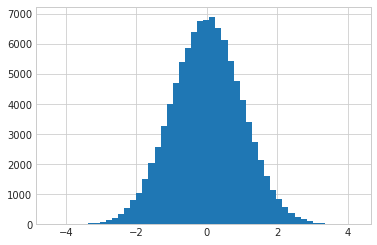

In [22]:
ax = plt.axes()
ax.hist(data, bins=50);

Better statistical plots with Seaborn

In [23]:
import seaborn as sns

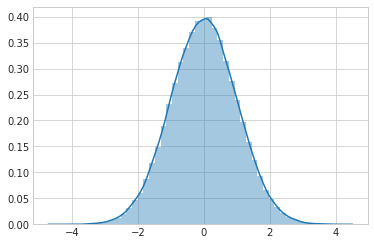

In [24]:
ax = plt.axes()
sns.distplot(data, ax=ax);

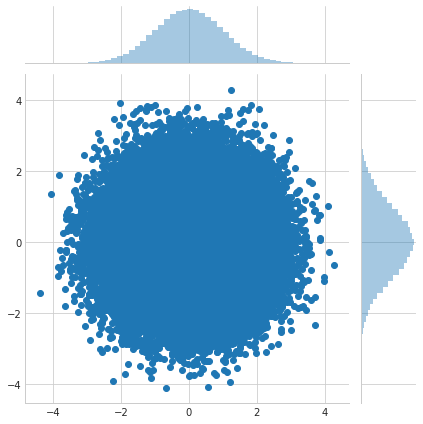

In [25]:
xy = np.random.randn(100_000, 2)
sns.jointplot(xy[:,0], xy[:,1]);

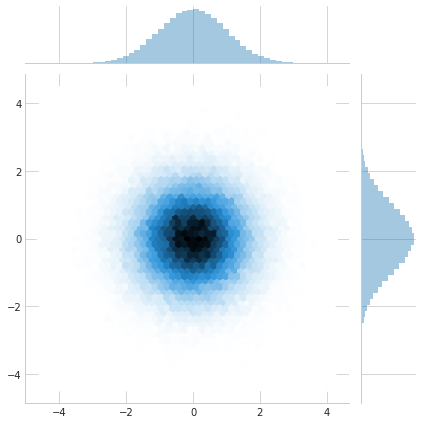

In [26]:
xy = np.random.randn(100_000, 2)
sns.jointplot(xy[:,0], xy[:,1], kind='hex');

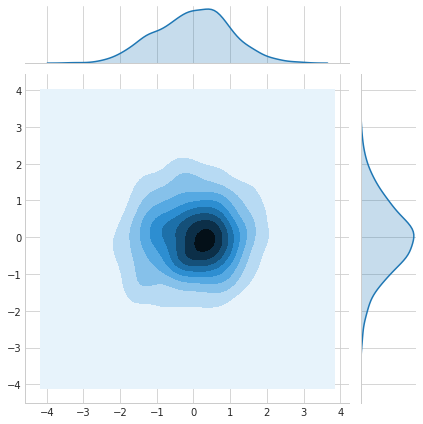

In [27]:
xy = np.random.randn(1000, 2)
sns.jointplot(xy[:,0], xy[:,1], kind='kde');

# Setting ticks & grid lines

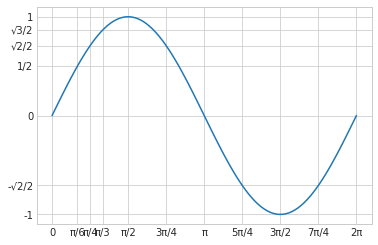

In [28]:
ax = plt.axes()
x = np.r_[:2 * np.pi: 100j]
ax.plot(x, np.sin(x))
xticks = {
    0: '0',
    np.pi/6: 'π/6',
    np.pi/4: 'π/4', 
    np.pi/3: 'π/3',
    np.pi/2: 'π/2', 
    3 * np.pi / 4: '3π/4', 
    np.pi: 'π', 
    5 * np.pi / 4: '5π/4', 
    3 * np.pi / 2: '3π/2', 
    7 * np.pi / 4: '7π/4',
    2 * np.pi: '2π',
}
yticks = {
    -1: '-1',
    -1 / np.sqrt(2): '-√2/2', 
    0: '0', 
    1 / np.sqrt(2): '√2/2',
    0.5: '1/2',
    np.sqrt(3) / 2: '√3/2',
    1: '1',
}

ax.set_xticks(list(xticks.keys()))
ax.set_xticklabels(list(xticks.values()))
ax.set_yticks(list(yticks.keys()))
ax.set_yticklabels(list(yticks.values()));


# And for a bit of fun...

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


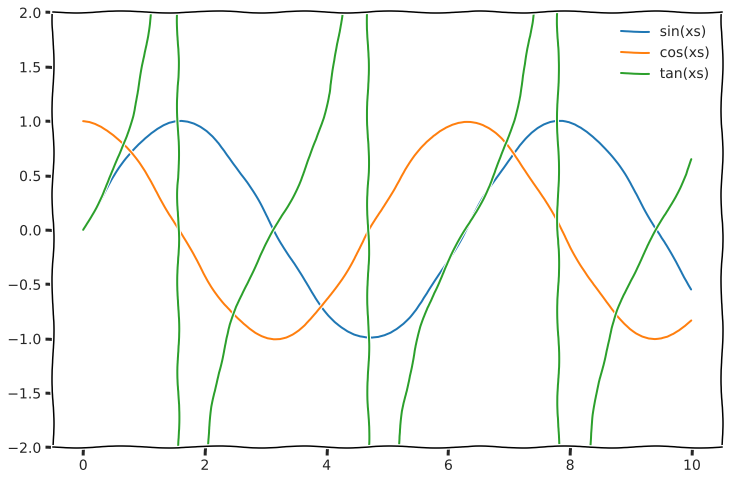

In [29]:
with plt.xkcd():
    ax = plt.axes()
    ax.figure.set_size_inches(12, 8)
    ax.plot(xs, np.sin(xs), label='sin(xs)')
    ax.plot(xs, np.cos(xs), label='cos(xs)')
    ax.plot(xs, np.tan(xs), label='tan(xs)');
    
    ax.set(ylim=(-2, 2))
    ax.legend()

# Lab

Open the [Matplotlib Lab][matplotlib-lab]

[matplotlib-lab]: ./matplotlib-lab.ipynb
